**Plan**

**1. Importance of feature engineering**<br>
**2.Handling missing data**<br>
**3. Feature scaling and normalization**<br>
**4. Creating new features**


# **Importance of feature engineering**

Feature engineering is a crucial step in the machine learning process because it directly influences the model's performance and effectiveness. It involves creating new features or modifying existing ones to improve the performance of machine learning algorithms. Here's why feature engineering is important:

**1. Improves Model Accuracy**
- **Enhanced Representation:** Properly engineered features can provide a more accurate representation of the underlying patterns in the data, leading to better model accuracy.
- **Relevant Information:** It ensures that the model focuses on the most relevant information, filtering out noise and irrelevant data.

**2. Simplifies Models**
- **Reduces Complexity:** By creating features that capture the essential information, feature engineering can simplify the model, making it more interpretable and easier to train.
- **Dimensionality Reduction:** Techniques like Principal Component Analysis (PCA) or selecting the most informative features can reduce the dimensionality of the dataset, making models more efficient.

**3. Handles Data Issues**
- **Missing Values:** Feature engineering can address missing values by creating new features that indicate the presence or absence of data, or by imputing missing values.
- **Normalization and Scaling:** Features can be transformed to have similar scales or distributions, which is important for algorithms that are sensitive to the scale of the data (e.g., gradient descent-based methods).

**4. Enhances Model Generalization**
- **Combats Overfitting:** Well-engineered features can help in reducing overfitting by providing more generalized information about the data patterns, leading to better performance on unseen data.
- **Robustness:** It can create features that are robust to variations in the data, thus making the model more reliable.

**5. Enables Use of Various Algorithms**
- **Algorithm Compatibility:** Some algorithms require specific types of features (e.g., linear regression assumes a linear relationship between features and the target). Feature engineering can transform features to meet these requirements.
- **Model Variety:** It allows the use of a variety of machine learning models by creating features that cater to the strengths of different algorithms.

**6. Improves Data Understanding**
- **Insight into Data:** The process of feature engineering forces a deeper understanding of the data and the domain, which can lead to better model selection and evaluation.
- **Business Insights:** It often reveals important insights about the business problem being solved, which can be valuable beyond the machine learning model itself.

**7. Feature Selection and Creation**
- **Relevant Features:** Identifies and creates features that have the most predictive power.
- **Domain Expertise:** Incorporates domain knowledge into the model by creating features that capture the specifics of the domain.

**Techniques in Feature Engineering**
- **Transformation:** Scaling, normalizing, and converting data into different formats.
- **Creation:** Generating new features through mathematical operations, aggregations, or interactions between existing features.
- **Encoding:** Converting categorical variables into numerical formats (e.g., one-hot encoding, label encoding).
- **Binning:** Grouping numerical variables into bins or categories.
- **Extraction:** Deriving features from complex data types like time series, text, or images.


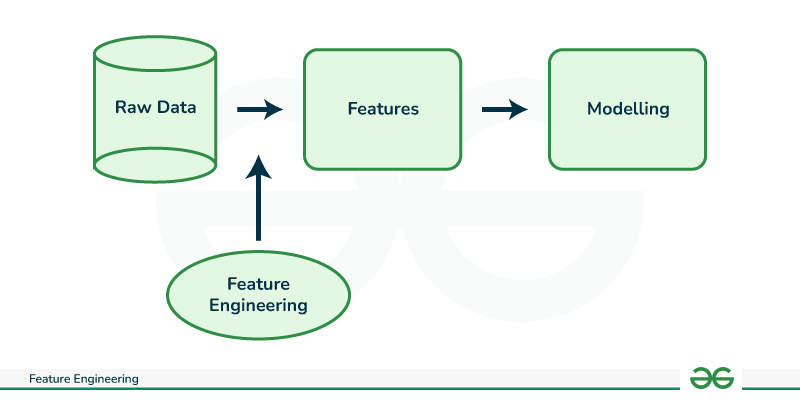

# **Handling missing data**

**Definition**

Handling missing data refers to the techniques used to address the absence of values in a dataset. Missing data can lead to biased estimates, reduced statistical power, and challenges in data analysis and modeling. Various methods can be employed to handle missing data, each with its advantages and drawbacks.

**Methods to Handle Missing Data**

1. **Deletion Methods**
   - **Listwise Deletion (Complete Case Analysis):** Remove any rows with missing values.
   - **Pairwise Deletion:** Only exclude missing values in specific analyses, retaining as much data as possible.

2. **Imputation Methods**
   - **Mean/Median/Mode Imputation:** Replace missing values with the mean, median, or mode of the column.
   - **Constant Value Imputation:** Replace missing values with a constant (e.g., -999, "Unknown").
   - **K-Nearest Neighbors (KNN) Imputation:** Use the nearest neighbors to impute missing values.
   - **Multivariate Imputation by Chained Equations (MICE):** Use multiple regression models to estimate missing values.
   - **Forward/Backward Fill:** Fill missing values using the next or previous values in time series data.

3. **Model-Based Methods**
   - **Predictive Modeling:** Use a machine learning model to predict and impute missing values.

4. **Advanced Methods**
   - **Matrix Factorization:** Use techniques like Singular Value Decomposition (SVD) to estimate missing values.
   - **Interpolation:** Estimate missing values in a time series or spatial data based on interpolation methods.


In [ ]:
# 1. DELETION METHOD

import pandas as pd

# Sample DataFrame
data = {'A': [1, 2, None, 4, 5],
        'B': [None, 2, 3, 4, 5]}
df = pd.DataFrame(data)

# Listwise Deletion
df_listwise = df.dropna()

# Pairwise Deletion
# For example, calculating correlation
correlation = df.corr()

print("Listwise Deletion:\n", df_listwise)
print("Pairwise Deletion Correlation:\n", correlation)

In [ ]:
# 2. IMPUTATION
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.impute import KNNImputer

# Sample DataFrame
data = {'A': [1, 2, None, 4, 5],
        'B': [None, 2, 3, 4, 5]}
df = pd.DataFrame(data)

# Mean Imputation
imputer_mean = SimpleImputer(strategy='mean')
df_mean = pd.DataFrame(imputer_mean.fit_transform(df), columns=df.columns)

# Median Imputation
imputer_median = SimpleImputer(strategy='median')
df_median = pd.DataFrame(imputer_median.fit_transform(df), columns=df.columns)

# Mode Imputation
imputer_mode = SimpleImputer(strategy='most_frequent')
df_mode = pd.DataFrame(imputer_mode.fit_transform(df), columns=df.columns)

# Constant Value Imputation
imputer_constant = SimpleImputer(strategy='constant', fill_value=-999)
df_constant = pd.DataFrame(imputer_constant.fit_transform(df), columns=df.columns)

# KNN Imputation
imputer_knn = KNNImputer(n_neighbors=2)
df_knn = pd.DataFrame(imputer_knn.fit_transform(df), columns=df.columns)

print("Mean Imputation:\n", df_mean)
print("Median Imputation:\n", df_median)
print("Mode Imputation:\n", df_mode)
print("Constant Value Imputation:\n", df_constant)
print("KNN Imputation:\n", df_knn)

In [ ]:
# 3. MODEL-BASED IMPUTATION
import pandas as pd
from sklearn.linear_model import LinearRegression

# Sample DataFrame
data = {'A': [1, 2, None, 4, 5],
        'B': [None, 2, 3, 4, 5]}
df = pd.DataFrame(data)

# Predictive Modeling for Imputation
df_train = df.dropna()
df_missing = df[df['A'].isnull()]

# Train model
model = LinearRegression()
model.fit(df_train[['B']], df_train['A'])

# Predict missing values
predicted_values = model.predict(df_missing[['B']])
df.loc[df['A'].isnull(), 'A'] = predicted_values

print("Model-Based Imputation:\n", df)

In [ ]:
# 4. Forward/Backward Fill
import pandas as pd

# Sample DataFrame
data = {'A': [1, 2, None, 4, 5],
        'B': [None, 2, 3, 4, 5]}
df = pd.DataFrame(data)

# Forward Fill
df_ffill = df.fillna(method='ffill')

# Backward Fill
df_bfill = df.fillna(method='bfill')

print("Forward Fill:\n", df_ffill)
print("Backward Fill:\n", df_bfill)


# **Feature scaling and normalization**

**Introduction**

Feature scaling and normalization are techniques used to standardize the range and distribution of data values, ensuring that they contribute equally to the model. This is particularly important for machine learning algorithms that are sensitive to the scale of the data, such as gradient descent-based algorithms.

**Methods for Feature Scaling and Normalization**

1. **Min-Max Scaling (Normalization)**
2. **Standardization (Z-score Normalization)**
3. **MaxAbs Scaling**
4. **Robust Scaling**
5. **Log Transformation**
6. **Power Transformation (Box-Cox, Yeo-Johnson)**



**<h2>Min-Max Scaling (Normalization)</h2>**




$$ X' = \frac{X - X_{\min}}{X_{\max} - X_{\min}} $$

where $ X $ is the original value, $ X_{\min} $ and $ X_{\max} $ are the minimum and maximum values of the feature, and $ X' $ is the scaled value.


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample DataFrame
data = {'A': [1, 2, 3, 4, 5],
        'B': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Min-Max Scaling
scaler = MinMaxScaler()
df_minmax = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("Min-Max Scaling:\n", df_minmax)

**<h2>Standardization (Z-score Normalization)</h2>**

$$ X' = \frac{X - \mu}{\sigma} $$

where $ X $ is the original value, $ \mu $ is the mean of the feature, $ \sigma $ is the standard deviation of the feature, and $ X' $ is the standardized value.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Sample DataFrame
data = {'A': [1, 2, 3, 4, 5],
        'B': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Standardization
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("Standardization:\n", df_standardized)

**<h2>MaxAbs Scaling</h2>**

$$ X' = \frac{X}{|X_{\max}|} $$

where $ X $ is the original value, $ X_{\max} $ is the maximum absolute value of the feature, and $ X' $ is the scaled value.

**<h2>Robust Scaling</h2>**

$$ X' = \frac{X - \text{median}(X)}{\text{IQR}(X)} $$

where $ X $ is the original value, the median is the median of the feature, IQR is the interquartile range (75th percentile - 25th percentile), and $ X' $ is the scaled value.


In [ ]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Sample DataFrame
data = {'A': [1, 2, 3, 4, 5],
        'B': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Robust Scaling
scaler = RobustScaler()
df_robust = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("Robust Scaling:\n", df_robust)

**<h2>Log Transformation</h2>**

$$ X' = \log(X + 1) $$

This formula ensures that the log transformation is defined for all non-negative values, with a small constant added to avoid issues with $ \log(0) $.

In [ ]:
import pandas as pd
import numpy as np

# Sample DataFrame
data = {'A': [1, 2, 3, 4, 5],
        'B': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Log Transformation
df_log = np.log1p(df)

print("Log Transformation:\n", df_log)


**<h2>Power Transformation</h2>**

- **Box-Cox:** $ X' = \frac{(X^\lambda - 1)}{\lambda} $ if $ \lambda \neq 0 $; $ X' = \log(X) $ if $ \lambda = 0 $
- **Yeo-Johnson:** Similar to Box-Cox but works with zero and negative values.

In [ ]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer

# Sample DataFrame
data = {'A': [1, 2, 3, 4, 5],
        'B': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Power Transformation (Yeo-Johnson)
scaler = PowerTransformer(method='yeo-johnson')
df_power = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("Power Transformation (Yeo-Johnson):\n", df_power)

# **Creating new features**

**Definition**

Creating new features, also known as feature engineering, involves generating additional input variables from existing data to improve the performance of machine learning models. These new features can capture complex relationships, domain-specific knowledge, or patterns that are not directly available in the original dataset.

**Methods for Creating New Features**

1. **Polynomial Features**
2. **Interaction Features**
3. **Derived Features (Date/Time Features)**
4. **Text Features (TF-IDF, Word Embeddings)**
5. **Domain-Specific Features**
6. **Aggregation and Grouping**

**<h2>Polynomial Features</h2>**

For a single feature $ X $ of degree $ d $:
$$ X' = [X, X^2, X^3, \ldots, X^d] $$

For two features $ X $ and $ Y $ of degree $ d $:
$$ X' = [X, Y, XY, X^2, Y^2, X^2Y, \ldots, X^dY^d] $$



In [2]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

# Sample DataFrame
data = {'A': [1, 2, 3, 4, 5],
        'B': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Polynomial Features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
df_poly = pd.DataFrame(poly.fit_transform(df))

print("Polynomial Features:\n", df_poly)


Polynomial Features:
      0     1     2      3       4
0  1.0  10.0   1.0   10.0   100.0
1  2.0  20.0   4.0   40.0   400.0
2  3.0  30.0   9.0   90.0   900.0
3  4.0  40.0  16.0  160.0  1600.0
4  5.0  50.0  25.0  250.0  2500.0


**<h2>Interaction Features</h2>**

For two features $X $ and $ Y $:
$$ X' = [X, Y, X \times Y] $$


In [6]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

# Sample DataFrame
data = {'A': [1, 2, 3, 4, 5],
        'B': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Interaction Features
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
df_interaction = pd.DataFrame(interaction.fit_transform(df))

print("Interaction Features:\n", df_interaction)


Interaction Features:
      0     1      2
0  1.0  10.0   10.0
1  2.0  20.0   40.0
2  3.0  30.0   90.0
3  4.0  40.0  160.0
4  5.0  50.0  250.0


**<h2>Derived Features (Date/Time Features)</h2>**

Extracting components from date/time features such as year, month, day, hour, etc.

In [7]:
import pandas as pd

# Sample DataFrame with Date/Time column
data = {'date': pd.date_range('2023-01-01', periods=5, freq='D')}
df = pd.DataFrame(data)

# Derived Date/Time Features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

print("Derived Date/Time Features:\n", df)


Derived Date/Time Features:
         date  year  month  day
0 2023-01-01  2023      1    1
1 2023-01-02  2023      1    2
2 2023-01-03  2023      1    3
3 2023-01-04  2023      1    4
4 2023-01-05  2023      1    5


**<h2>Text Features (TF-IDF, Word Embeddings)</h2>**

- TF-IDF (Term Frequency-Inverse Document Frequency): Measures the importance of a word in a document relative to a corpus.
- Word Embeddings: Vector representations of words that capture semantic meanings.

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample DataFrame with text data
data = {'text': ['hello world', 'machine learning is awesome', 'natural language processing']}
df = pd.DataFrame(data)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])

df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

df_tfidf


,awesome,hello,is,language,learning,machine,natural,processing,world
0,0.0,0.707107,0.0,0.00000,0.0,0.0,0.00000,0.00000,0.707107
1,0.5,0.000000,0.5,0.00000,0.5,0.5,0.00000,0.00000,0.000000
2,0.0,0.000000,0.0,0.57735,0.0,0.0,0.57735,0.57735,0.000000


**<h2>Domain-Specific Features</h2>**

Creation of features based on domain knowledge, such as financial ratios, medical scores, engineering parameters, etc.

In [10]:
import pandas as pd

# Sample DataFrame with domain-specific data
data = {'salary': [50000, 60000, 70000, 80000, 90000],
        'expenses': [20000, 25000, 30000, 35000, 40000]}
df = pd.DataFrame(data)

# Financial Ratio Example
df['savings_ratio'] = (df['salary'] - df['expenses']) / df['salary']

print("Domain-Specific Features:\n", df)


Domain-Specific Features:
    salary  expenses  savings_ratio
0   50000     20000       0.600000
1   60000     25000       0.583333
2   70000     30000       0.571429
3   80000     35000       0.562500
4   90000     40000       0.555556


**<h2>Aggregation and Grouping</h2>**

Aggregating data based on groups, such as mean, sum, count, etc.

In [11]:
import pandas as pd

# Sample DataFrame
data = {'Category': ['A', 'B', 'A', 'B', 'A'],
        'Value': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Grouping and Aggregation
df_grouped = df.groupby('Category').agg({'Value': ['mean', 'sum', 'count']})
df_grouped.columns = ['mean_value', 'total_value', 'count_value']

print("Aggregated Features:\n", df_grouped)


Aggregated Features:
           mean_value  total_value  count_value
Category                                      
A               30.0           90            3
B               30.0           60            2
